# Stock Movement Analysis Based on Social Media Sentiment# 

In [159]:
import pandas as pd
import requests
import praw

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime, timedelta
import pytz


In [160]:
import seaborn as sns

In [161]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from datetime import datetime, timedelta
import re

In [162]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# Initialize stemmer and stopwords
port_stem = PorterStemmer()
stowords = stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Poonam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [166]:
reddit = praw.Reddit(
    user_agent=True,
    client_id="",
    client_secret="",
    username=""
)

# fetching reddit data from subreddits related to stocks

In [167]:
subreddit1 = reddit.subreddit("stocks")
subreddit2 = reddit.subreddit("IndianStockMarket")
subreddit3 = reddit.subreddit("StockMarket")
subreddit4 = reddit.subreddit("finance")
subreddit5 = reddit.subreddit("IndianInvestment")
subreddit6 = reddit.subreddit("StockMarketIndia")

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = text.lower()
    text=text.split()
    text=[port_stem.stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
      # Convert to lowercase
    return text

# Scrape posts
posts = []
subreddits = [subreddit1, subreddit2, subreddit3, subreddit4, subreddit5, subreddit6]
for subreddit in subreddits:
    for post in subreddit.hot(limit=10000):  # 700 per subreddit to reach ~2000
        post_data = {
            "Date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
            "score": post.score,
            "Headline": clean_text(post.title)
        }
        posts.append(post_data)

# Create DataFrame
df = pd.DataFrame(posts)
print("Data scraped successfully!")

# Save to CSV
df.to_csv('reddit_posts.csv', index=False)

# Preview DataFrame
df.head()

Data scraped successfully!


,Date,score,Headline
0,2024-12-01,12,rate portfolio rstock quarterli thread decemb
1,2024-12-07,3,rstock weekend discuss saturday dec
2,2024-12-07,67,take money
3,2024-12-07,54,portfolio wrap
4,2024-12-07,174,decad backtest insight chang invest


In [168]:
df

,Date,score,Headline
0,2024-12-01,12,rate portfolio rstock quarterli thread decemb
1,2024-12-07,3,rstock weekend discuss saturday dec
2,2024-12-07,67,take money
3,2024-12-07,54,portfolio wrap
4,2024-12-07,174,decad backtest insight chang invest
...,...,...,...
2494,2024-11-14,0,loss swiggi intraday normal capit suck downani...
2495,2024-11-14,1,anyon know smart money concept
2496,2024-11-14,2,jubil industri ltd aka jublind
2497,2024-11-14,0,detail analysi nifti basi demand suppli


# Download Nestlé stock data from the Swiss Exchange (NESN.SW)

In [169]:
import yfinance as yf


stock_data = yf.download("NESN.SW", start="2024-08-01", end="2024-12-05")
stock_data.to_csv('stock_data.csv', index=False)
# Preview the data
print(stock_data.head())




[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open   Volume
Ticker        NESN.SW    NESN.SW    NESN.SW    NESN.SW    NESN.SW  NESN.SW
Date                                                                      
2024-08-02  89.400002  89.400002  90.760002  88.419998  88.959999  6111491
2024-08-05  87.279999  87.279999  89.400002  87.019997  88.440002  5056459
2024-08-06  87.519997  87.519997  88.080002  86.139999  86.879997  4854966
2024-08-07  89.279999  89.279999  89.339996  86.459999  86.540001  3370346
2024-08-08  89.139999  89.139999  89.599998  88.080002  89.459999  3061608


In [170]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NESN.SW,NESN.SW,NESN.SW,NESN.SW,NESN.SW,NESN.SW
Date,,,,,,
2024-08-02,89.400002,89.400002,90.760002,88.419998,88.959999,6111491
2024-08-05,87.279999,87.279999,89.400002,87.019997,88.440002,5056459
2024-08-06,87.519997,87.519997,88.080002,86.139999,86.879997,4854966
2024-08-07,89.279999,89.279999,89.339996,86.459999,86.540001,3370346
2024-08-08,89.139999,89.139999,89.599998,88.080002,89.459999,3061608
...,...,...,...,...,...,...
2024-11-28,76.639999,76.639999,76.779999,75.940002,76.019997,4095385
2024-11-29,76.480003,76.480003,76.480003,75.760002,76.379997,4561408


In [171]:
stock_data.columns = ['_'.join(filter(None, col)).strip() for col in stock_data.columns]

In [172]:
stock_data

,Adj Close_NESN.SW,Close_NESN.SW,High_NESN.SW,Low_NESN.SW,Open_NESN.SW,Volume_NESN.SW
Date,,,,,,
2024-08-02,89.400002,89.400002,90.760002,88.419998,88.959999,6111491
2024-08-05,87.279999,87.279999,89.400002,87.019997,88.440002,5056459
2024-08-06,87.519997,87.519997,88.080002,86.139999,86.879997,4854966
2024-08-07,89.279999,89.279999,89.339996,86.459999,86.540001,3370346
2024-08-08,89.139999,89.139999,89.599998,88.080002,89.459999,3061608
...,...,...,...,...,...,...
2024-11-28,76.639999,76.639999,76.779999,75.940002,76.019997,4095385
2024-11-29,76.480003,76.480003,76.480003,75.760002,76.379997,4561408
2024-12-02,76.599998,76.599998,77.139999,76.139999,76.279999,3788734


In [173]:
df['Sentiment'] = np.random.randint(0, 2, size=len(df))

In [175]:
df['Date'] = pd.to_datetime(df['Date'])


# merge stock data with reddit data

In [176]:
merged_data = pd.merge(df, stock_data, on='Date', how='inner')
merged_data.to_csv("merge_data.csv")

In [177]:
merged_data

,Date,score,Headline,Sentiment,Adj Close_NESN.SW,Close_NESN.SW,High_NESN.SW,Low_NESN.SW,Open_NESN.SW,Volume_NESN.SW
0,2024-12-04,304,meta announc billion data center louisiana,1,76.360001,76.360001,76.680000,76.059998,76.339996,3908643
1,2024-12-04,316,guy believ begin great melt recess come somewh...,0,76.360001,76.360001,76.680000,76.059998,76.339996,3908643
2,2024-12-04,124,intel ceo shakeup put foundri plan chip act ca...,1,76.360001,76.360001,76.680000,76.059998,76.339996,3908643
3,2024-12-04,208,amazon su dc attorney gener allegedli exclud n...,1,76.360001,76.360001,76.680000,76.059998,76.339996,3908643
4,2024-12-04,30,share american eagl plung compani issu weak ho...,1,76.360001,76.360001,76.680000,76.059998,76.339996,3908643
...,...,...,...,...,...,...,...,...,...,...
1706,2024-11-14,0,loss swiggi intraday normal capit suck downani...,1,78.739998,78.739998,79.540001,77.320000,77.620003,5027775
1707,2024-11-14,1,anyon know smart money concept,1,78.739998,78.739998,79.540001,77.320000,77.620003,5027775
1708,2024-11-14,2,jubil industri ltd aka jublind,0,78.739998,78.739998,79.540001,77.320000,77.620003,5027775
1709,2024-11-14,0,detail analysi nifti basi demand suppli,0,78.739998,78.739998,79.540001,77.320000,77.620003,5027775


# TF-IDF Vectorization

In [178]:

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(merged_data['Headline'])
y = merged_data['Sentiment']
# Labels (sentiment)



In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
from sklearn.model_selection import train_test_split

# Train Test Data

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

# Lasso

In [182]:
model = LogisticRegression(solver="saga", penalty="l2")
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)


In [183]:
from sklearn.metrics import accuracy_score, classification_report

In [184]:
from sklearn import metrics

In [185]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)

Logic Regression accuracy:  0.5451895043731778


array([[89, 89],
       [67, 98]])

In [186]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       178
           1       0.52      0.59      0.56       165

    accuracy                           0.55       343
   macro avg       0.55      0.55      0.54       343
weighted avg       0.55      0.55      0.54       343



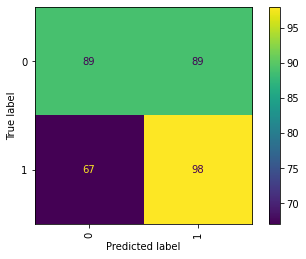

In [187]:


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.xticks(rotation=90)
plt.show()


# Ridge regression

In [188]:
model = LogisticRegression(solver="saga", penalty="l1")
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)

In [189]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)
print("confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))

Logic Regression accuracy:  0.478134110787172
confusion matrix:
 [[ 40 138]
 [ 41 124]]


In [190]:
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.478134110787172
Precision score is : 0.4839441330068115
Recall score is : 0.478134110787172
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.22      0.31       178
           1       0.47      0.75      0.58       165

    accuracy                           0.48       343
   macro avg       0.48      0.49      0.44       343
weighted avg       0.48      0.48      0.44       343



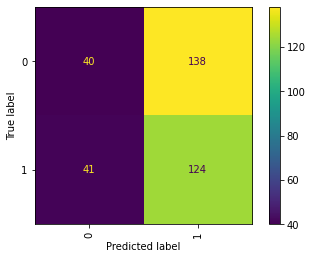

In [191]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.xticks(rotation=90)
plt.show()


# Model evaluation using improvement matrix

In [192]:
# import the metrics class
from sklearn import metrics
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[ 40, 138],
       [ 41, 124]])

In [193]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.478134110787172
Precision score is : 0.4839441330068115
Recall score is : 0.478134110787172
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.22      0.31       178
           1       0.47      0.75      0.58       165

    accuracy                           0.48       343
   macro avg       0.48      0.49      0.44       343
weighted avg       0.48      0.48      0.44       343



Text(0.5, 257.44, 'Predicted label')

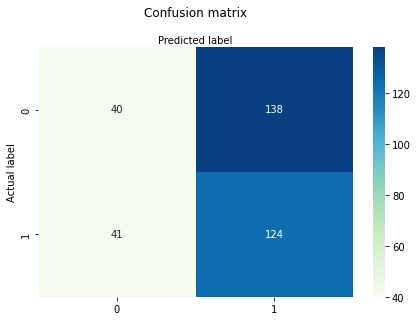

In [195]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Testing the model 1 (Logistic Regression)

In [196]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.478134110787172
Precision score is : 0.4839441330068115
Recall score is : 0.478134110787172
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.22      0.31       178
           1       0.47      0.75      0.58       165

    accuracy                           0.48       343
   macro avg       0.48      0.49      0.44       343
weighted avg       0.48      0.48      0.44       343



# Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier


In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [199]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [200]:
print("Random Forest\n")
print("confusion matrix:\n {}".format(confusion_matrix(y_test, Y_pred)))
print("\n\naccuracy: {}".format(accuracy_score(y_test, Y_pred)))

Random Forest

confusion matrix:
 [[97 81]
 [71 94]]


accuracy: 0.5568513119533528


In [201]:
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.478134110787172
Precision score is : 0.4839441330068115
Recall score is : 0.478134110787172
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.22      0.31       178
           1       0.47      0.75      0.58       165

    accuracy                           0.48       343
   macro avg       0.48      0.49      0.44       343
weighted avg       0.48      0.48      0.44       343



# Ridge random forest

In [202]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [203]:
print("Random Forest\n")
print("confusion matrix:\n {}".format(confusion_matrix(y_test, Y_pred)))
print("\n\naccuracy: {}".format(accuracy_score(y_test, Y_pred)))

Random Forest

confusion matrix:
 [[100  78]
 [ 72  93]]


accuracy: 0.5626822157434402


In [204]:
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.478134110787172
Precision score is : 0.4839441330068115
Recall score is : 0.478134110787172
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.22      0.31       178
           1       0.47      0.75      0.58       165

    accuracy                           0.48       343
   macro avg       0.48      0.49      0.44       343
weighted avg       0.48      0.48      0.44       343



# Model evaluation using improvement matrix

In [205]:
# import the metrics class
from sklearn import metrics
cof_matrix = metrics.confusion_matrix(y_test, Y_pred)
cof_matrix




array([[100,  78],
       [ 72,  93]])

# Visualization

Text(0.5, 257.44, 'Predicted label')

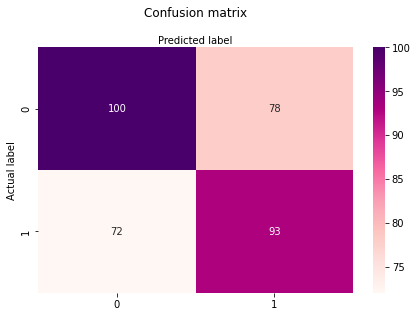

In [206]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cof_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Testing the model 2 (Random Forest)


In [207]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, Y_pred))
print('Precision score is :', metrics.precision_score(y_test, Y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, Y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, Y_pred))

Accuracy score is : 0.5626822157434402
Precision score is : 0.5633388169046252
Recall score is : 0.5626822157434402
		Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57       178
           1       0.54      0.56      0.55       165

    accuracy                           0.56       343
   macro avg       0.56      0.56      0.56       343
weighted avg       0.56      0.56      0.56       343

